# **Learning Best Practices for Model Evaluation and Hyperparameter Tuning**

Now, it’s time to learn about the best practices of building good machine learning models by fine-tuning the algorithms and evaluating the performance of the models. In this chapter, we will learn how to do the following:
 - Assess the performance of machine learning models
 - Diagnose the common problems of machine learning algorithms
 - Fine-tune machine learning models
 - Evaluate predictive models using different performance metric

**Streamlining workflows with pipelines**
In this
section, you will learn about an extremely handy tool, the Pipeline class in scikit-learn. It allows us to fit a model including an arbitrary number of transformation steps and apply it to make predictions about new data.

**Loading the Breast Cancer Wisconsin dataset**

In this section, we will read in the dataset and split it into training and test datasets in three simple steps:
1. We will start by reading in the dataset directly from the UCI website using pandas:

In [ ]:
import pandas as pd
df = pd.read_csv(
 'https://archive.ics.uci.edu/ml/'
 'machine-learning-databases'
 '/breast-cancer-wisconsin/wdbc.data',
 header=None
)

2. Next, we will assign the 30 features to a NumPy array, X. Using a LabelEncoder object, we will
transform the class labels from their original string representation ('M' and 'B') into integers:

In [ ]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

3. After encoding the class labels (diagnosis) in an array, y, the malignant tumors are now represented as class 1, and the benign tumors are represented as class 0, respectively. We can
double-check this mapping by calling the transform method of the fitted LabelEncoder on
two dummy class labels:

In [ ]:
le.transform(['M', 'B'])

array([1, 0])

4. Before we construct our first model pipeline in the following subsection, let’s divide the dataset
into a separate training dataset (80 percent of the data) and a separate test dataset (20 percent
of the data):

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
    test_size=0.20,
    stratify=y,
    random_state=45)

## **Combining transformers and estimators in a pipeline**

Many learning algorithms require input features on the same scale for optimal performance. Since the features in the Breast Cancer Wisconsin dataset are measured on various different scales, we will standardize the columns in the [Breast Cancer Wisconsin dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) before we feed them to a linear classifier, such as logistic regression. Furthermore, let’s assume that we want to compress our data from the initial 30 dimensions into a lower two-dimensional subspace via **principal component analysis (PCA)**, a feature extraction technique for dimensionality reduction that was introduced in Chapter 5.
Instead of going through the model fitting and data transformation steps for the training and test datasets separately, we can chain the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA), and [LogisticRegression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) objects in a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html):

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.956


![image.png](attachment:image.png)

### **Using k-fold cross-validation to assess model performance**
Common cross-validation techniques **holdout cross-validation** and **k-fold cross-validation**, which can help us to obtain reliable estimates of the model’s generalization performance, that is, how well the model performs on unseen data.

### **The holdout method**

A better way of using the holdout method for model selection is to separate the data into three parts:
a training dataset, a validation dataset, and a test dataset. The training dataset is used to fit the different models, and the performance on the validation dataset is then used for model selection. The
advantage of having a test dataset that the model hasn’t seen before during the training and model selection steps is that we can obtain a less biased estimate of its ability to generalize to new data. Figure
6.2 illustrates the concept of holdout cross-validation, where we use a validation dataset to repeatedly evaluate the performance of the model after training using different hyperparameter values. Once we are satisfied with the tuning of hyperparameter values, we estimate the model’s generalization performance on the test dataset:

![image.png](attachment:image.png)

**Note:**
A disadvantage of the holdout method is that the performance estimate may be very sensitive to how we partition the training dataset into the training and validation subsets; the estimate will vary for different examples of the data.


### **K-fold cross-validation**

In k-fold cross-validation, we randomly split the training dataset into k folds without replacement.
Here, k – 1 folds, the so-called training folds, are used for the model training, and one fold, the so-called test fold, is used for performance evaluation. This procedure is repeated k times so that we obtain k models and performance estimates.

We then calculate the average performance of the models based on the different, independent test folds to obtain a performance estimate that is less sensitive to the sub-partitioning of the training data compared to the holdout method. Typically, we use k-fold cross-validation for model tuning, that is, finding the optimal hyperparameter values that yield a satisfying generalization performance, which is estimated from evaluating the model performance on the test folds.

Once we have found satisfactory hyperparameter values, we can retrain the model on the complete training dataset and obtain a final performance estimate using the independent test dataset. The rationale behind fitting a model to the whole training dataset after k-fold cross-validation is that first, we are typically interested in a single, final model (versus k individual models), and second, providing more training examples to a learning algorithm usually results in a more accurate and robust model.


Since k-fold cross-validation is a resampling technique without replacement, the advantage of this approach is that in each iteration, each example will be used exactly once, and the training and test folds are disjoint. Furthermore, all test folds are disjoint; that is, there is no overlap between the test folds. Figure 6.3 summarizes the concept behind k-fold cross-validation with k = 10. The training dataset is divided into 10 folds, and during the 10 iterations, 9 folds are used for training, and 1 fold will be used as the test dataset for model evaluation.

Also, the estimated performances, Ei (for example, classification accuracy or error), for each fold are then used to calculate the estimated average performance, E, of the model:

![image-2.png](attachment:image-2.png)

**In summary**
 - k-fold cross-validation makes better use of the dataset than the holdout method with a validation set, since in k-fold cross-validation all data points are being used for evaluation.
 - A good standard value for k in k-fold cross-validation is 10, as empirical evidence shows.
 - 10-fold cross-validation offers the best tradeoff between bias and variance
 - , if we are working with relatively small training sets, it can be useful to increase the number of folds
 -  If we increase the value of k, more training data will be used in each iteration, which results in a lower pessimistic bias toward estimating the generalization performance by averaging the individual model estimates
 - However, large values of k will also increase the runtime of the cross-validationalgorithm and yield estimates with higher variance, since the training folds will be more similar to each other
 - On the other hand, if we are working with large datasets, we can choose a smaller value for k, for example, k = 5, and still obtain an accurate estimate of the average performance of the model while reducing the computational cost of refitting and evaluating the model on the different folds.

![image-3.png](attachment:image-3.png)

### **Stratified k-fold cross-validation**

A slight improvement over the standard k-fold cross-validation approach is stratified k-fold cross-validation, which can yield better bias and variance estimates, especially in cases of unequal class proportions, which has also been shown in the same study by Ron Kohavi referenced previously in this
section. In stratified cross-validation, the class label proportions are preserved in each fold to ensure that each fold is representative of the class proportions in the training dataset, which we will illustrate by using the StratifiedKFold iterator in scikit-learn:


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
     pipe_lr.fit(X_train[train], y_train[train])
     score = pipe_lr.score(X_train[test], y_train[test])
     scores.append(score)
     print(f'Fold: {k+1:02d}, '
          f'Class distr.: {np.bincount(y_train[train])}, '
          f'Acc.: {score:.3f}')

Fold: 01, Class distr.: [256 153], Acc.: 1.000
Fold: 02, Class distr.: [256 153], Acc.: 0.978
Fold: 03, Class distr.: [256 153], Acc.: 0.978
Fold: 04, Class distr.: [256 153], Acc.: 0.957
Fold: 05, Class distr.: [256 153], Acc.: 0.957
Fold: 06, Class distr.: [257 153], Acc.: 0.933
Fold: 07, Class distr.: [257 153], Acc.: 0.956
Fold: 08, Class distr.: [257 153], Acc.: 0.911
Fold: 09, Class distr.: [257 153], Acc.: 0.978
Fold: 10, Class distr.: [257 153], Acc.: 0.889


In [ ]:
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')


CV accuracy: 0.954 +/- 0.032


**Scikitlearn also implements a k-fold cross-validation scorer**

Which allows us to evaluate our model using
stratified k-fold cross-validation less verbosely:

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [1.         0.97826087 0.97826087 0.95652174 0.95652174 0.93333333
 0.95555556 0.91111111 0.97777778 0.88888889]
CV accuracy: 0.954 +/- 0.032


An extremely useful feature of the cross_val_score approach is that we can distribute the evaluation of the different folds across **multiple central processing units (CPUs)** on our machine. If we set the n_jobs parameter to 1, only one CPU will be used to evaluate the performances, just like in our
StratifiedKFold example previously. However, by setting n_jobs=2, we could distribute the 10 rounds of cross-validation to two CPUs (if available on our machine), and by setting n_jobs=-1, we can use all available CPUs on our machine to do the computation in parallel.

### **Debugging algorithms with learning and validation curves**

Two very simple yet powerful diagnostic tools that can help us to
improve the performance of a learning algorithm: **learning curves** and **validation curves**.
 - Use learning curves to diagnose whether a learning algorithm has a problem with overfitting (high variance) or underfitting (high bias)
 - validation curves, which can help us to address the common issues of learning algorithms.

### **Diagnosing bias and variance problems with learning curves**

If a model is too complex for a given training dataset—for example, think of a very deep decision tree—the model tends to overfit the training data and does not generalize well to unseen data. Often, it can help to collect more training examples to reduce the degree of overfitting.

However, in practice, it can often be very expensive or simply not feasible to collect more data. By plotting the model training and validation accuracies as functions of the training dataset size, we can easily detect whether the model suffers from high variance or high bias, and whether the collection of more data could help to address this problem.

But before we discuss how to plot learning curves in scikit-learn, let’s discuss those two common model issues by walking through the following illustration:

![image.png](attachment:image.png)

**High bias**
 - The model has both low training and cross-validation accuracy, which indicates that it underfits the training data.
 - Common ways to address this issue are to increase the number of model parameters, for example, by
    - collecting or constructing additional features, or
    - by decreasing the degree of regularization, for example, in support vectormachine (SVM) or logistic regression classifiers.
    
**High Variance**
 - The model that suffers from high variance, which is indicated by the large gap between the training and cross-validation accuracy.
 - To address this problem of overfitting,
      - we can collect more training data,
      - reduce the complexity of the model, or increase the regularization parameter, for example.
      
For unregularized models, it can also help to decrease the number of features via feature selection (Chapter 4) or feature extraction (Chapter 5) to decrease the degree of overfitting. While collecting more training data usually tends to decrease the chance of overfitting, it may not always help, for example, if the training data is extremely noisy or the model is already very close to optimal.

Note that we passed max_iter=10000 as an additional argument when instantiating the
LogisticRegression object (which uses 1,000 iterations as a default) to avoid convergence issues for
the smaller dataset sizes or extreme regularization parameter values (covered in the next section). After
we have successfully executed the preceding code, we will obtain the following learning curve plot:


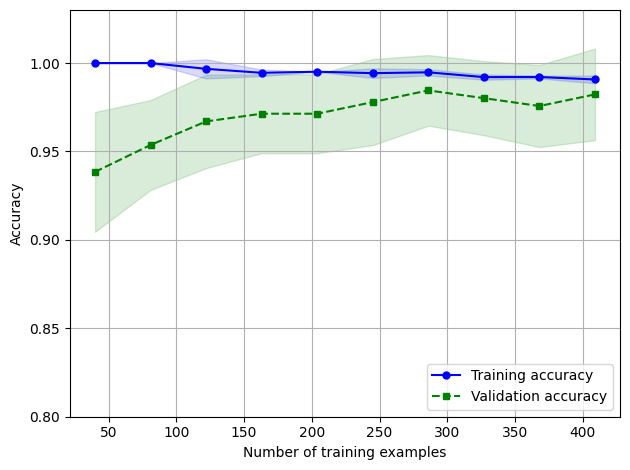

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print("Note that we passed max_iter=10000 as an additional argument when instantiating the\n\
LogisticRegression object (which uses 1,000 iterations as a default) to avoid convergence issues for\n\
the smaller dataset sizes or extreme regularization parameter values (covered in the next section). After\n\
we have successfully executed the preceding code, we will obtain the following learning curve plot:")


plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('figures/06_05.png', dpi=300)
plt.show()

### **Addressing over- and underfitting with validation curves**

Validation curves are a useful tool for improving the performance of a model by addressing issues such
as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting
the training and test accuracies as functions of the sample size, we vary the values of the model parameters, for example, the inverse regularization parameter, C, in logistic regression.

Let’s go ahead and see how we create validation curves via scikit-learn:

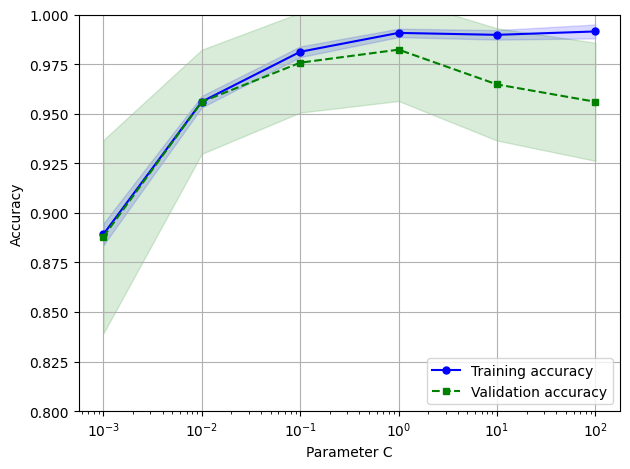

In [ ]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr,
                X=X_train,
                y=y_train,
                param_name='logisticregression__C',
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('figures/06_06.png', dpi=300)
plt.show()

Although the differences in the accuracy for varying values of C are subtle, we can see that the model
slightly underfits the data when we increase the regularization strength (small values of C). However,
for large values of C, it means lowering the strength of regularization, so the model tends to slightly
overfit the data. In this case, the sweet spot appears to be between 0.01 and 0.1 of the C value.

### **Fine-tuning machine learning models via grid search**

In machine learning, we have two types of parameters: those that are learned from the training data,for example,
 - the weights in logistic regression
 - the parameters of a learning algorithm that are optimized separately.

The latter are the tuning parameters (or hyperparameters) of a model, for example,
the regularization parameter in logistic regression or the maximum depth parameter of a decision tree

### **Tuning hyperparameters via grid search**

The grid search approach is quite simple: it’s a brute-force exhaustive search paradigm where we specify a list of values for different hyperparameters, and the computer evaluates the model performance for each combination to obtain the optimal combination of values from this set

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(round(gs.best_score_,2)*100,"%")
print(gs.best_params_)

98.0 %
{'svc__C': 0.1, 'svc__kernel': 'linear'}
CPU times: user 10.7 s, sys: 5.08 ms, total: 10.7 s
Wall time: 10.8 s


Finally, we use the independent test dataset to estimate the performance of the best-selected model,
which is available via the best_estimator_ attribute of the GridSearchCV object:

In [ ]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

Test accuracy: 0.991


### **Exploring hyperparameter configurations more widely with randomized search**

 In **randomized search**, we draw hyperparameter configurations randomly from distributions (or discrete sets). In contrast to **grid search**, randomized search does not do an exhaustive search over the hyperparameter space. Still, it allows us to explore a wider range of hyperparameter value settings in a more cost- and time-effective manner. This concept is illustrated in Figure 6.7, which shows a fixed grid of nine hyperparameter settings being searched via **grid search** and **randomized search**:


![image.png](attachment:image.png)

**Note:** The main takeaway is that while grid search only explores discrete, user-specified choices, it may miss good hyperparameter configurations if the search space is too scarce.

In [ ]:
import scipy.stats


param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]

param_range = scipy.stats.loguniform(0.0001, 1000.0)

np.random.seed(1)
param_range.rvs(10)

array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

Let’s now see the RandomizedSearchCV in action and tune an SVM as we did with GridSearchCV in
the previous section

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))

In [ ]:
%%time

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
               {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]
rs = RandomizedSearchCV(estimator=pipe_svc,
               param_distributions=param_grid,
               scoring='accuracy',
               refit=True,
               n_iter=20,
               cv=10,
               random_state=1,
               n_jobs=-1)
rs = rs.fit(X_train, y_train)
print(round(rs.best_score_,2)*100,"%")
print(rs.best_params_)

98.0 %
{'svc__C': 0.05971247755848463, 'svc__kernel': 'linear'}
CPU times: user 240 ms, sys: 17.6 ms, total: 258 ms
Wall time: 3.28 s


### **More resource-efficient hyperparameter search with successive halving**

Taking the idea of randomized search one step further, scikit-learn implements a successive halving
variant, HalvingRandomSearchCV, that makes finding suitable hyperparameter configurations more
efficient. Successive halving, given a large set of candidate configurations, successively throws out
unpromising hyperparameter configurations until only one configuration remains. We can summarize
the procedure via the following steps:

 1. Draw a large set of candidate configurations via random sampling
 2. Train the models with limited resources, for example, a small subset of the training data (as
opposed to using the entire training set)
 3. Discard the bottom 50 percent based on predictive performance
 4. Go back to step 2 with an increased amount of available resources

The steps are repeated until only one hyperparameter configuration remains. Note that there is also
a successive halving implementation for the grid search variant called HalvingGridSearchCV, where
all specified hyperparameter configurations are used in step 1 instead of random samples.

In scikit-learn 1.0, HalvingRandomSearchCV is still experimental, which is why we have to enable it first:


In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [ ]:
hs = HalvingRandomSearchCV(
    pipe_svc,
    param_distributions=param_grid,
    n_candidates='exhaust',
    resource='n_samples',
    factor=1.5,
    random_state=1,
    n_jobs=-1)

In [ ]:
hs = hs.fit(X_train, y_train)
print(hs.best_score_)
print(hs.best_params_)

0.9705882352941178
{'svc__C': 0.05971247755848463, 'svc__kernel': 'linear'}


In [ ]:
clf = hs.best_estimator_
print(f'Test accuracy: {hs.score(X_test, y_test):.3f}')

Test accuracy: 0.982


### **Algorithm selection with nested cross-validation**

In nested cross-validation, we have an outer k-fold cross-validation loop to split the data into training and test folds, and an inner loop is used to select the model using k-fold cross-validation on the training fold. After model selection, the test fold is then used to evaluate the model performance. Figure 6.8 explains the concept of nested cross-validation with only five outer and two inner folds, which can be useful for large datasets where computational performance is important; this particular type of nested cross-validation is also known as 5×2 cross-validation:

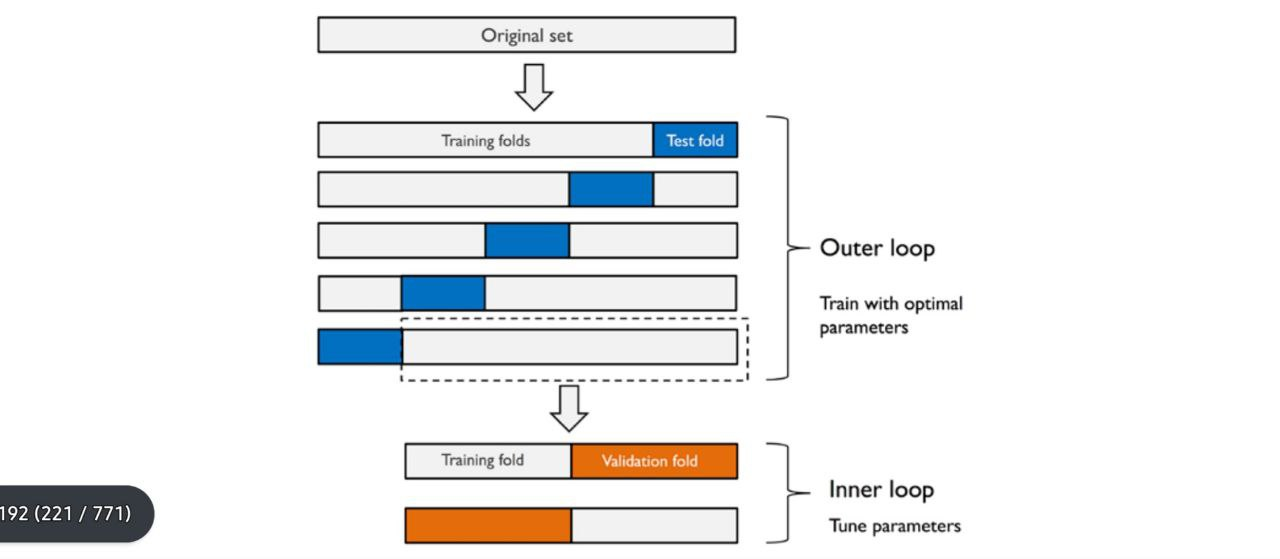

In [ ]:
%%time

param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
                {'svc__C': param_range,
                 'svc__gamma': param_range,
                 'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                   cv=2)

scores = cross_val_score(gs, X_train, y_train,
                          scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy: 0.969 +/- 0.021
CPU times: user 6.48 s, sys: 0 ns, total: 6.48 s
Wall time: 6.6 s


The returned average cross-validation accuracy gives us a good estimate of what to expect if we tune the hyperparameters of a model and use it on unseen data.

For example, we can use the nested cross-validation approach to compare an SVM model to a simple decision tree classifier; for simplicity, we will only tune its depth parameter:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
    scoring='accuracy',
    cv=2
    )
scores = cross_val_score(gs, X_train, y_train,
                         scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy: 0.923 +/- 0.028


As we can see, the nested cross-validation performance of the SVM model (97.4 percent) is notably better than the performance of the decision tree (93.4 percent), and thus, we’d expect that it might be the better choice to classify new data that comes from the same population as this particular dataset.

### **Looking at different performance evaluation metrics**

In the previous sections and chapters, we evaluated different machine learning models using prediction accuracy, which is a useful metric with which to quantify the performance of a model in general.
However, there are several other performance metrics that can be used to measure a model’s relevance, such as **precision, recall, the F1 score, and Matthews correlation coefficient (MCC)**.

### **Reading a confusion matrix**

A confusion matrix is simply a square matrix that reports the counts of the true positive (TP), true neg-
ative (TN), false positive (FP), and false negative (FN) predictions of a classifier, as shown in Figure 6.9:
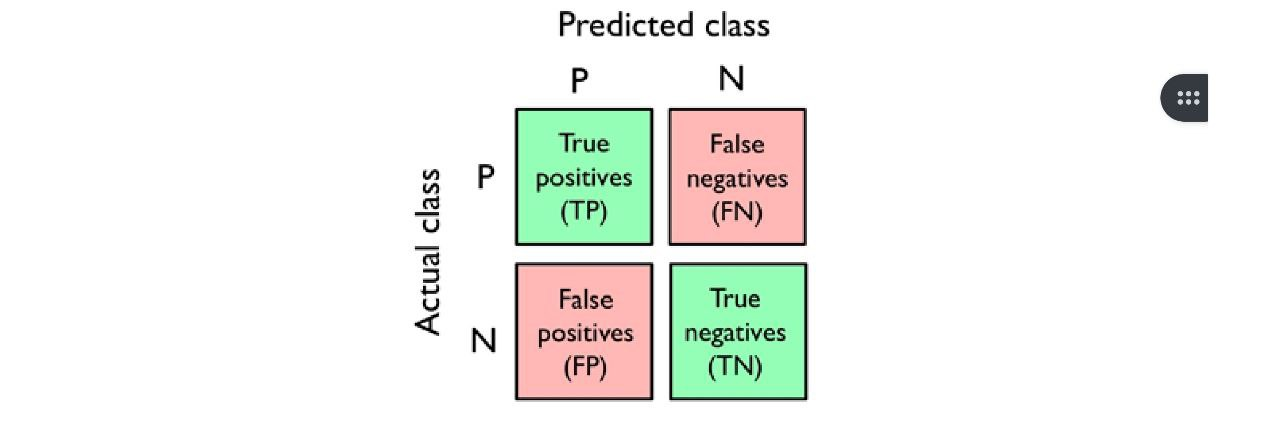


**Scikit-learn confusion_matrix function:**

In [ ]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[72  0]
 [ 1 41]]


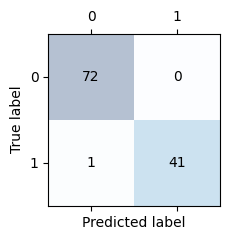

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

### **Optimizing the precision and recall of a classification model**

The performance metrics:

ERR = 1 - ACC   or


ACC = 1 - ERR

The true positive rate (TPR) and false positive rate (FPR) are performance metrics that are especially useful for imbalanced class problems:

FPR = FP/N  = FP/(FP+TN)

REC = TPR = TP/P  = TP/(FN+TP)

PRE = TP/(TP+FP)


**Recall:** quantifies how many of the relevant records (the positives) are captured as such (the true positives).


**Precision:** quantifies how many of the records predicted as relevant (the sum of
true and false positives) are actually relevant (true positives).


**F1-score:** To balance the up- and downsides of optimizing PRE and REC, the harmonic mean of PRE and REC is used, the so-called F1 score:


F1 = 2*(PRE * REC)/(PRE + REC)





**Matthews correlation coefficient (MCC)**
Lastly, a measure that summarizes a  confusion matrix is the MCC, which is  especially popular in biological research  contexts. The MCC is calculated as follows:

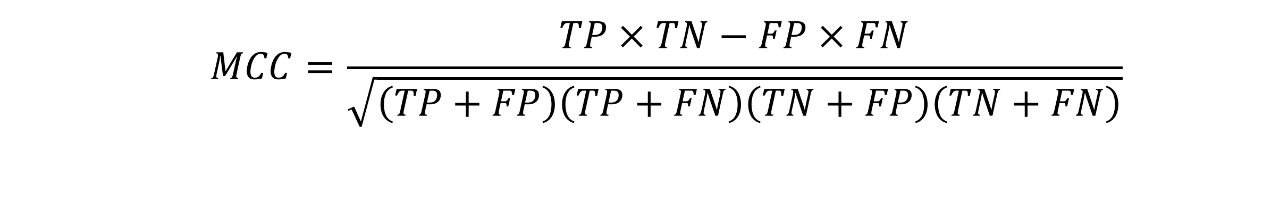

**MCC ranges between –1 and 1**, and it takes all elements of a confusion matrix into account—for instance, the F1 score does not involve the TN. While the MCC values are harder to interpret than the F1 score, it is regarded as a superior metric, as described in the following article: The advantages of the Matthews correlation coefficient (MCC) over F1 score and accuracy in binary classification evaluation by D. Chicco and G. Jurman, BMC Genomics. pp. 281-305, 2012, <i>https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7</i>.

### **Sci-kit-learn implementation:**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import matthews_corrcoef

pre_val = precision_score(y_true=y_test, y_pred=y_pred)
print(f'Precision: {pre_val:.3f}')

rec_val = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true=y_test, y_pred=y_pred)
print(f'F1: {f1_val:.3f}')

mcc_val = matthews_corrcoef(y_true=y_test, y_pred=y_pred)
print(f'MCC: {mcc_val:.3f}')

Precision: 1.000
Recall: 0.976
F1: 0.988
MCC: 0.981


**make_scorer function**

In [ ]:
from sklearn.metrics import make_scorer
c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
              'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9827545192613327
{'svc__C': 0.1, 'svc__kernel': 'linear'}


### **Plotting a receiver operating characteristic**

**Receiver operating characteristic (ROC)** graphs are useful tools to select models for classification based on their performance with respect to the FPR and TPR, which are computed by shifting the decision threshold of the classifier. The diagonal of a ROC graph can be interpreted as random guessing,
and classification models that fall below the diagonal are considered as worse than random guessing.
A perfect classifier would fall into the top-left corner of the graph with a TPR of 1 and an FPR of 0.
Based on the ROC curve, we can then compute the so-called **ROC area under the curve (ROC AUC)** to
characterize the performance of a classification model.

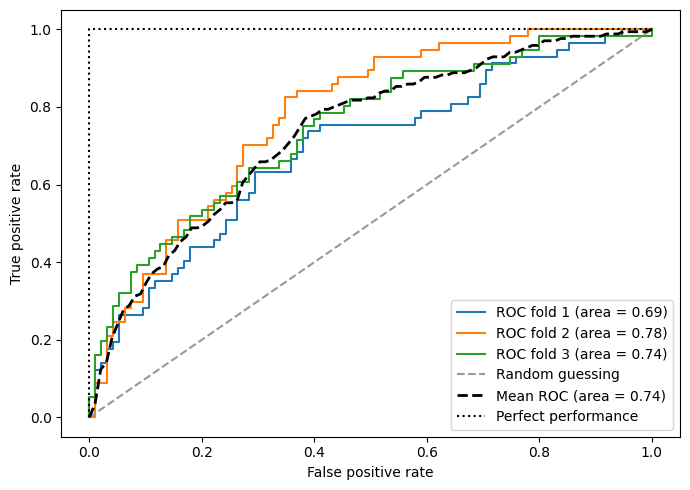

In [ ]:
from sklearn.metrics import roc_curve, auc
from numpy import interp

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))

X_train2 = X_train[:, [4, 14]]


cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show();

### **Scoring metrics for multiclass classification**

The scoring metrics that we’ve discussed so far are specific to binary classification systems. However, scikit-learn also implements **macro** and **micro** averaging methods to extend those scoring metrics to multiclass problems via one-vs.-all (OvA) classification. The micro-average is calculated from the individual TPs, TNs, FPs, and FNs of the system.



**Note:** Micro-averaging is useful if we want to weight each instance or prediction equally, whereas macro-av-
eraging weights all classes equally to evaluate the overall performance of a classifier with regard to
the most frequent class labels.


If we are using binary performance metrics to evaluate multiclass classification models in scikit-learn,
a normalized or weighted variant of the macro-average is used by default. The weighted macro-av-
erage is calculated by weighting the score of each class label by the number of true instances when
calculating the average. The weighted macro-average is useful if we are dealing with class imbalances,
that is, different numbers of instances for each label.


While the weighted macro-average is the default for multiclass problems in scikit-learn, we can specify
the averaging method via the average parameter inside the different scoring functions that we import
from the sklearn.metrics module, for example, the precision_score or make_scorer functions:

In [ ]:
pre_scorer = make_scorer(score_func=precision_score,
                        pos_label=1,
                        greater_is_better=True,
                        average='micro')

### **Dealing with class imbalance**

 1. One way to deal with imbalanced class proportions during model fitting is to assign a larger penalty
to wrong predictions on the minority class. Via scikit-learn, adjusting such a penalty is as convenient
as setting the class_weight parameter to class_weight='balanced', which is implemented for most
classifiers.

2. Other popular strategies for dealing with class imbalance include
  - **upsampling** the minority class,
  - **downsampling** the majority class,
  - and the **generation of synthetic training** examples.

Unfortunately, there’s no universally best solution or technique that works best across different problem domains.

Thus, in practice, it is recommended to try out different strategies on a given problem, evaluate the
results, and choose the technique that seems most appropriate.

In [ ]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [ ]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

89.92443324937027

The scikit-learn library implements a simple resample function that can help with the upsampling of the minority class by drawing new samples from the dataset with replacement. The following code will take the minority class from our imbalanced Breast Cancer Wisconsin dataset (here, class 1) and repeatedly draw new samples from it until it contains the same number of examples as class label 0:

### **Upsampling Minority class**

In [ ]:
from sklearn.utils import resample

print('Number of class 1 examples before:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

Number of class 1 examples before: 40
Number of class 1 examples after: 357


After resampling, we can then stack the original class 0 samples with the upsampled class 1 subset to
obtain a balanced dataset as follows:

In [ ]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [ ]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

### **Downsampling Majority class**

In [ ]:
from sklearn.utils import resample

print('Number of class 1 examples before:', X_imb[y_imb == 0].shape[0])

X_downsampled, y_downsampled = resample(X_imb[y_imb == 0],
                                    y_imb[y_imb == 0],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 1].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_downsampled.shape[0])

Number of class 1 examples before: 357
Number of class 1 examples after: 40


After resampling, we can then stack the original class 1 samples with the downsampled class 0 subset to
obtain a balanced dataset as follows:

In [ ]:
X_bal = np.vstack((X[y == 1], X_downsampled))
y_bal = np.hstack((y[y == 1], y_downsampled))

In [ ]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

15.873015873015872

**Generating new training data to address class imbalance**

Another technique for dealing with class imbalance is the generation of synthetic training examples, which is beyond the scope of this book. Probably the most widely used algorithm for synthetic training data generation is Synthetic Minority Over-sampling Technique(SMOTE), and you can learn more about this technique in the original research article by
Nitesh Chawla and others: SMOTE: Synthetic Minority Over-sampling Technique, Journal of
Artificial Intelligence Research, 16: 321-357, 2002, which is available at https://www.jair.
org/index.php/jair/article/view/10302. It is also highly recommended to check
out imbalanced-learn, a Python library that is entirely focused on imbalanced datasets,
including an implementation of SMOTE. You can learn more about imbalanced-learn at
https://github.com/scikit-learn-contrib/imbalanced-learn.



## **Summary**